## Naive Bayes

Prepare a classification model using Naive Bayes for salary data

Data Description:

age -- age of a person

workclass -- A work class is a grouping of work

education -- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation -- occupation of an individuals

relationship -- 

race -- Race of an Individual

sex -- Gender of an Individual

capitalgain -- profit received from the sale of an investment

capitalloss -- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual



In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [4]:
from google.colab import files
upload = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test (1).csv


In [5]:
test_data = pd.read_csv('SalaryData_Test.csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [13]:
from google.colab import files
upload = files.upload()

Saving SalaryData_Train.csv.crdownload to SalaryData_Train.csv.crdownload


In [15]:
train_data = pd.read_csv('SalaryData_Train.csv.crdownload')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21106,28,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,Canada,<=50K
21107,53,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,<=50K
21108,26,Private,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,45,United-States,<=50K
21109,28,Local-gov,HS-grad,9,Never-married,Transport-moving,Own-child,Black,Female,0,0,40,United-States,<=50K


In [16]:
df_temp = test_data.append(train_data)
df_temp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21106,28,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,Canada,<=50K
21107,53,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,<=50K
21108,26,Private,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,45,United-States,<=50K
21109,28,Local-gov,HS-grad,9,Never-married,Transport-moving,Own-child,Black,Female,0,0,40,United-States,<=50K


In [17]:
train = train_data.copy()
test = test_data.copy()
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [18]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
str_c

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [27]:
for i in str_c:
  train[i]= LabelEncoder().fit_transform(train[i])
  test[i]= LabelEncoder().fit_transform(test[i])
  
mapping = {'>50K':1, '<=50K':2}
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [28]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [29]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [30]:
df = train.append(test)

In [31]:
df1 = df.copy()
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [32]:
df1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000,36171.000000
mean,38.592436,2.204639,10.312571,10.119018,2.584584,5.970225,1.412070,3.681817,0.674656,1089.155981,88.427221,40.926930,35.966824
std,13.257643,0.960417,3.811475,2.542699,1.502463,4.031919,1.595604,0.830358,0.468510,7480.602066,404.289771,11.975941,6.107488
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000


In [33]:
df1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           1
dtype: int64

In [67]:
df1 = df.apply (pd.to_numeric, errors='coerce')
df1 = df.dropna()


In [68]:
df1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

## Correlation

In [69]:
corr=df1.corr()

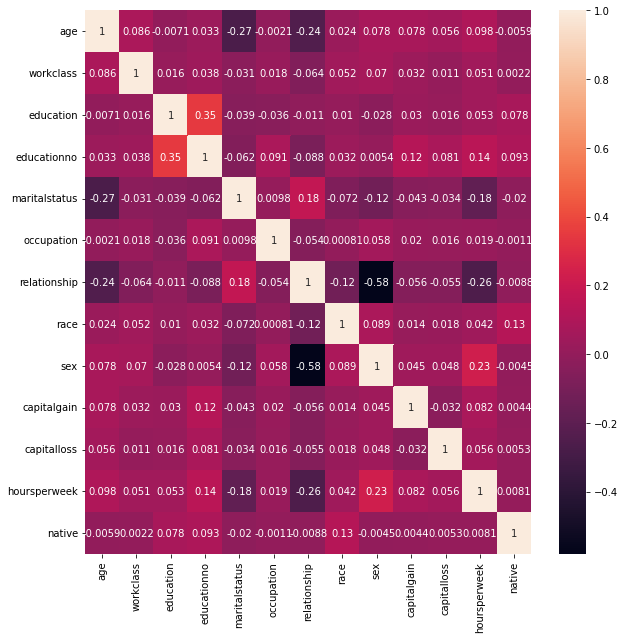

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()


In [71]:
df1.index.is_unique


False

In [72]:
df1=df1.loc[~df1.index.duplicated(), :]

Skew: -0.284396338106331
Kurtosis: 0.6179279986455577


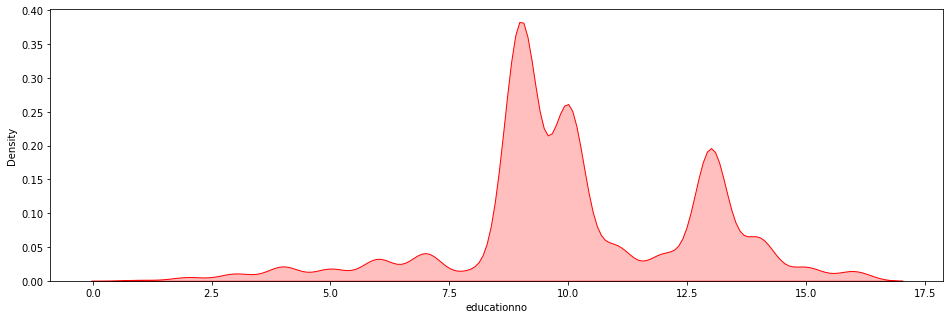

In [73]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
sns.kdeplot(df1['educationno'],shade=True,color='r')
plt.show()


## The Data is negatively skewed and has Low Kurtosis value


## Most of people have eduction Number of years of education 8 - 11


## 4. Naive Bayes

In [74]:
x_train = train.iloc[:,0:13]
y_train = train.iloc[:,13]
x_test = test.iloc[:,0:13]
y_test = test.iloc[:,13]

In [78]:
x_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [79]:
y_train.isna().sum()

1

In [80]:
 y_train = df.apply (pd.to_numeric, errors='coerce')
y_train = df.dropna()

In [81]:
y_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

## GaussianNB

In [87]:
cls_fr_gnb = GaussianNB()
cls_fr_gnb.fit(x_test, y_test)


GaussianNB()

In [92]:
y_pred_gnb = cls_fr_gnb.predict(x_test)

In [93]:
confusion_matrix(y_test, y_pred_gnb)


array([[10777,   583],
       [ 2516,  1184]])

In [94]:
pd.crosstab(y_test.values.flatten(),cls_fr_gnb)

col_0,GaussianNB()
row_0,
<=50K,11360
>50K,3700


In [95]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten()))

Accuracy 0.7942231075697211


## MultinomialNB


In [98]:
cls_fr_mnb = MultinomialNB().fit(x_test, y_test)

In [99]:
y_pred_mnb = cls_fr_mnb.predict(x_test)


In [100]:
confusion_matrix(y_test, y_pred_mnb)


array([[10891,   469],
       [ 2920,   780]])

In [101]:
pd.crosstab(y_test.values.flatten(),cls_fr_mnb)

col_0,MultinomialNB()
row_0,
<=50K,11360
>50K,3700


In [103]:
print ("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))

Accuracy 0.7749667994687915


## GaussianNB Model has a better Accuracy than MultinomialNB